<a href="https://colab.research.google.com/github/jingxlim/course-content/blob/interactive-track/tutorials/W0D1_PythonWorkshop1/student/W0D1_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuromatch Academy: Week 0, Day 1, Tutorial 1
# Python for NMA - LIF Neuron - Part I

__Content creators:__ Marco Brigham and the [CCNSS](https://www.ccnss.org/) team

__Content reviewers:__ Michael Waskom, Karolina Stosio, Spiros Chavlis

---
## Tutorial objectives
NMA students, you are going to use Python skills to advance your understanding of neuroscience. Just like two legs that support and strengthen each other. One has "Python" written in it, and the other has "Neuro". And step-by-step they go.

&nbsp; 

In this notebook, we'll practice basic operations with Python variables, control flow, plotting, and a sneak peek at `np.array`, the workhorse of scientific computation in Python.

&nbsp; 

Each new concept in Python will unlock a different aspect of our implementation of a **Leaky Integrate-and-Fire (LIF)** neuron. And as if it couldn't get any better, we'll visualize the evolution of its membrane potential in time, and extract its statistical properties!

&nbsp; 

Well then, let's start our walk today!

---
## Imports and helper functions
Please execute the cell(s) below to initialize the notebook environment.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

In [2]:
# @title Figure settings
import ipywidgets as widgets

%config InlineBackend.figure_format = 'retina'

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

---
## Neuron model
A *membrane equation* and a *reset condition* define our *leaky-integrate-and-fire (LIF)* neuron:


\begin{align*}
\\
&\tau_m\,\frac{d}{dt}\,V(t) = E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th}\\
\\
&V(t) = V_{reset} &\text{otherwise}\\
\\
\end{align*}

where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $R$ is the membrane resistance, $I(t)$ is the synaptic input current, $V_{th}$ is the firing threshold, and $V_{reset}$ is the reset voltage. We can also write $V_m$ for membrane potential - very convenient for plot labels.

The membrane equation is an *ordinary differential equation (ODE)* that describes the time evolution of membrane potential $V(t)$ in response to synaptic input and leaking of change across the cell membrane.

**Note that, in this tutorial the neuron model will not implement a spiking mechanism.**

Video available at https://youtube.com/watch?v=UP8rD2AwceM


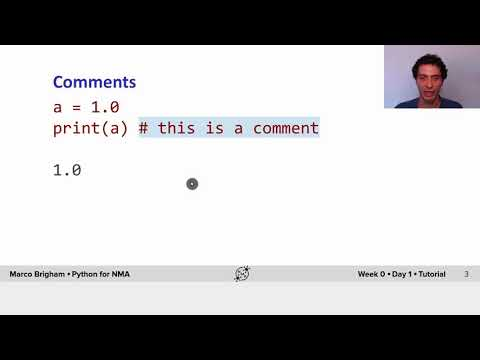

In [ ]:
# @title Video: Synaptic input
video = YouTubeVideo(id='UP8rD2AwceM', width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

### Exercise 1
We start by defining and initializing the main simulation variables.

**Suggestions**
* Modify the code below to print the simulation parameters

In [3]:
# Exercise 1
# insert your code here

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


**SAMPLE OUTPUT**

```
0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10
```

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_ea2e072e.py)



### Exercise 2
![synaptic input](https://github.com/mpbrigham/colaboratory-figures/raw/master/nma/python-for-nma/synaptic_input.png)

We start with a sinusoidal model to simulate the synaptic input $I(t)$ given by:
\begin{align*}
\\
I(t)=I_{mean}\left(1+\sin\left(\frac{2 \pi}{0.01}\,t\right)\right)\\
\\
\end{align*}

Compute the values of synaptic input $I(t)$ between $t=0$ and $t=0.009$ with step $\Delta t=0.001$.

**Suggestions**
* Loop variable `step` for 10 steps (`step` takes values from `0` to `9`)
* At each time step
    * Compute the value of `t` with variables `step` and `dt`
    * Compute the value of `i`
    * Print `i`
* Use `np.pi` and `np.sin` for evaluating $\pi$ and $\sin(\cdot)$, respectively

In [4]:
# Exercise 2
# initialize t
t = 0

# loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):
  t = step * dt

  # --> insert your code here
  i = i_mean * (1 + np.sin( ((2*np.pi) / 0.01) * t))

  print(i)



2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688166e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


**SAMPLE OUTPUT**

```
2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688176e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10
```

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_1a190769.py)



### Exercise 3
Print formatting is handy for displaying simulation parameters in a clean and organized form. Python 3.6 introduced the new string formatting [f-strings](https://www.python.org/dev/peps/pep-0498). Since we are dealing with type `float` variables, we use `f'{x:.3f}'` for formatting `x` to three decimal points, and `f'{x:.4e}'` for four decimal points but in exponential notation.
```
x = 3.14159265e-1
print(f'{x:.3f}')
--> 0.314

print(f'{x:.4e}')
--> 3.1416e-01
```

Repeat the loop from the previous exercise and print the `t` values with three decimal points, and synaptic input $I(t)$ with four decimal points in exponential notation.

For additional formatting options with f-strings see [here](http://zetcode.com/python/fstring/).

**Suggestions**
* Print `t` and `i` with help of *f-strings* formatting

In [8]:
# Exercise 3
# initialize step_end
step_end = 10

i_t = []
t_step = []

# loop for step_end steps
for step in range(step_end):
  t = step * dt

  # --> insert your code here
  i = i_mean * (1 + np.sin( ((2*np.pi) / 0.01) * t))

  i_t.append(i)
  t_step.append(t)
  
  print(f'{t:.3f}', f'{i:.4e}')


0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


**SAMPLE OUTPUT**

```
0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10
```

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_d4f77dbf.py)



## ODE integration without spikes
In the next exercises, we now simulate the evolution of the membrane equation in discrete time steps, with a sufficiently small $\Delta t$.

We start by writing the time derivative $d/dt\,V(t)$ in the membrane equation without taking the limit $\Delta t \to 0$:

\begin{align*}
\\
\tau_m\,\frac{V\left(t+\Delta t\right)-V\left(t\right)}{\Delta t} &= E_{L} - V(t) + R\,I(t) \qquad\qquad (1)\\
\\
\end{align*}

The value of membrane potential $V\left(t+\Delta t\right)$ can be expressed in terms of its previous value $V(t)$ by simple algebraic manipulation. For *small enough* values of $\Delta t$, this provides a good approximation of the continuous-time integration.

This operation is an integration since we obtain a sequence $\{V(t), V(t+\Delta t), V(t+2\Delta t),...\}$ starting from the ODE. Notice how the ODE describes the evolution of $\frac{d}{dt}\,V(t)$, the derivative of $V(t)$, but not directly the evolution of $V(t)$. For the evolution of $V(t)$ we need to integrate the ODE, and in this tutorial, we will do a discrete-time integration using the Euler method. See [Numerical methods for ordinary differential equations](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) for additional details.

Video available at https://youtube.com/watch?v=kyCbeR28AYQ


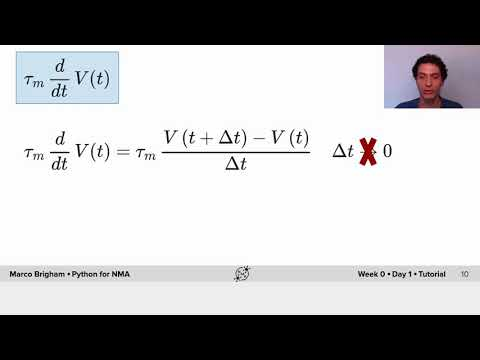

In [ ]:
# @title Video: Discrete time integration
video = YouTubeVideo(id='kyCbeR28AYQ', width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

### Exercise 4
Compute the values of $V(t)$ between $t=0$ and $t=0.01$ with step $\Delta t=0.001$ and $V(0)=E_L$.

We will write a `for` loop from scratch in this exercise. The following three formulations are all equivalent and loop for three steps:
```
for step in [0, 1, 2]:
  print(step)

for step in range(3):
  print(step)

start = 0
end = 3
stepsize = 1

for step in range(start, end, stepsize):
  print(step)
```


**Suggestions**
* Reorganize the Eq. (1) to isolate $V\left(t+\Delta t\right)$ on the left side, and express it as function of $V(t)$ and the other terms
* Initialize the membrane potential variable `v` to leak potential `el`
* Loop variable `step` for `10` steps
* At each time step
    * Compute the current value of `t`, `i`
    * Print the current value of `t` and `v`
    * Update the value of `v`

In [19]:
step


9

In [26]:
# initialize step_end and v
step_end = 10
v = el

# loop for step_end steps
for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
  print(f"{t:.3f} {i:.4e} {v:.4e}") 
  v = v + dt/tau * (el - v + r*i)

0.000 2.5000e-10 -6.0000e-02
0.001 3.9695e-10 -5.8750e-02
0.002 4.8776e-10 -5.6828e-02
0.003 4.8776e-10 -5.4548e-02
0.004 3.9695e-10 -5.2381e-02
0.005 2.5000e-10 -5.0778e-02
0.006 1.0305e-10 -4.9989e-02
0.007 1.2236e-11 -4.9974e-02
0.008 1.2236e-11 -5.0414e-02
0.009 1.0305e-10 -5.0832e-02


In [27]:
# Exercise 4
# initialize step_end and v
step_start = 0
step_end = 0.01

v = el  # initialize the membrane potential to leak potential el

# loop for step_end steps
for step, t in enumerate(np.arange(step_start, step_end, dt)):
  
  # --> insert your code here
  V = (el - v + r*i_t[step]) * dt/tau + v

  print(f"{t:.3f} {i_t[step]:.4e} {v:.4e}") 

  v = V


0.000 2.5000e-10 -6.0000e-02
0.001 3.9695e-10 -5.8750e-02
0.002 4.8776e-10 -5.6828e-02
0.003 4.8776e-10 -5.4548e-02
0.004 3.9695e-10 -5.2381e-02
0.005 2.5000e-10 -5.0778e-02
0.006 1.0305e-10 -4.9989e-02
0.007 1.2236e-11 -4.9974e-02
0.008 1.2236e-11 -5.0414e-02
0.009 1.0305e-10 -5.0832e-02


**SAMPLE OUTPUT**

```
0.000 -6.0000e-02
0.001 -5.8750e-02
0.002 -5.6828e-02
0.003 -5.4548e-02
0.004 -5.2381e-02
0.005 -5.0778e-02
0.006 -4.9989e-02
0.007 -4.9974e-02
0.008 -5.0414e-02
0.009 -5.0832e-02
```

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_3e7c92b6.py)



Video available at https://youtube.com/watch?v=BOh8CsuTFkY


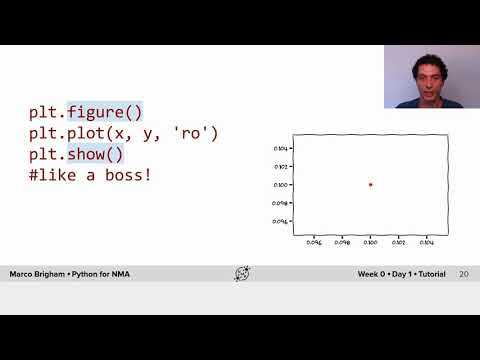

In [ ]:
# @title Video: Plotting
from IPython.display import YouTubeVideo
video = YouTubeVideo(id='BOh8CsuTFkY', width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

### Exercise 5
![synaptic input discrete](https://github.com/mpbrigham/colaboratory-figures/raw/master/nma/python-for-nma/synaptic_input_discrete.png)

Plot the values of $I(t)$ between $t=0$ and $t=0.024$.

**Suggestions**
* Increase `step_end`
* initialize the figure with `plt.figure`, set title, x and y labels with `plt.title`, `plt.xlabel` and `plt.ylabel`, respectively
* Replace printing command `print` with plotting command `plt.plot` with argument `'ko'` (short version for `color='k'` and `marker='o'`) for black small dots
* Use `plt.show()` at the end to display the plot

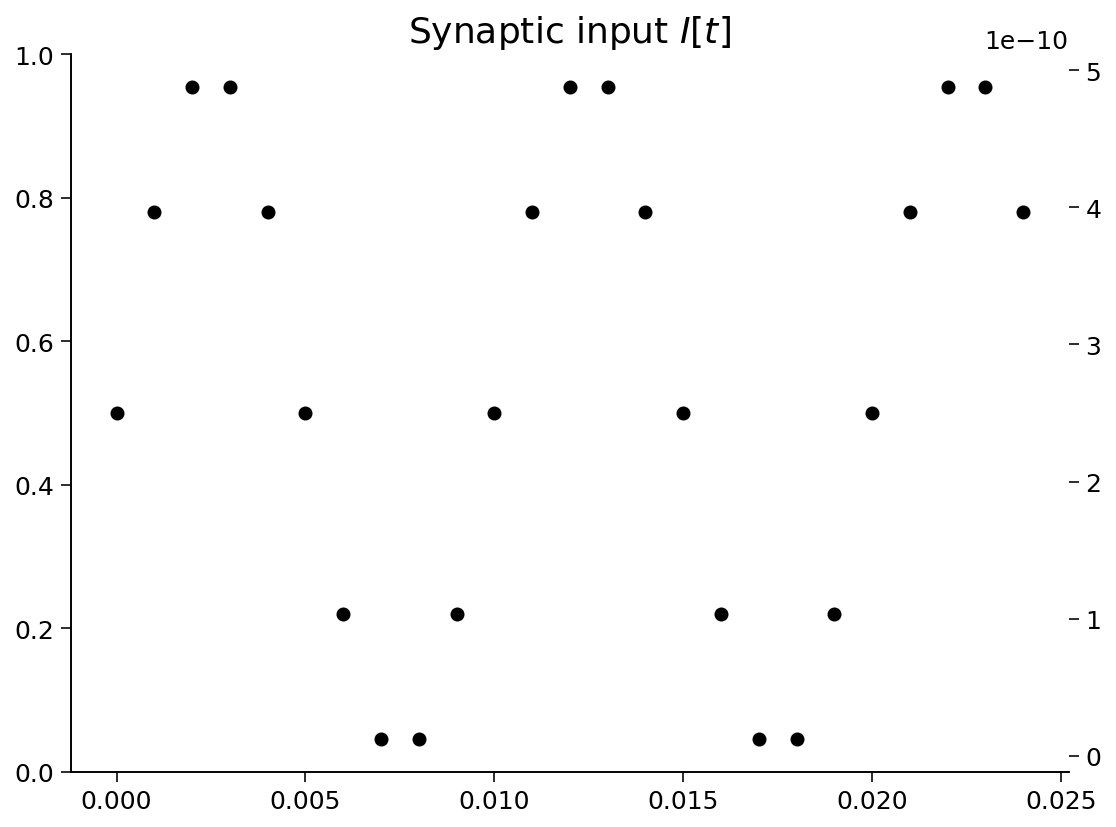

In [37]:
# Exercise 5
# initialize step_end
step_end = 25

# initialize the figure
fig, ax = plt.subplots()
ax1 = ax.twinx()

# loop for step_end steps
for step in range(step_end):
  t = step * dt

  # --> insert your code here
  # calculate current input
  i = i_mean * (1 + np.sin( ((2*np.pi) / 0.01) * t))

  # calculate membrane potential
  V = (el - v + r*i) * dt/tau + v
  v = V ## update membrane potential

  # ax.plot(t, v, color='r', marker='o')
  ax1.plot(t, i, color='k', marker='o')

ax.set_title('Synaptic input $I[t]$')
plt.show()

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_70724599.py)

*Example output:*

<img alt='Solution hint' align='left' width=559 height=416 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_70724599_0.png>



### Exercise 6
Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$.

**Suggestions**
* Compute the required number of steps with`int(t_max/dt)`
* Use plotting command for black small(er) dots with argument `'k.'`

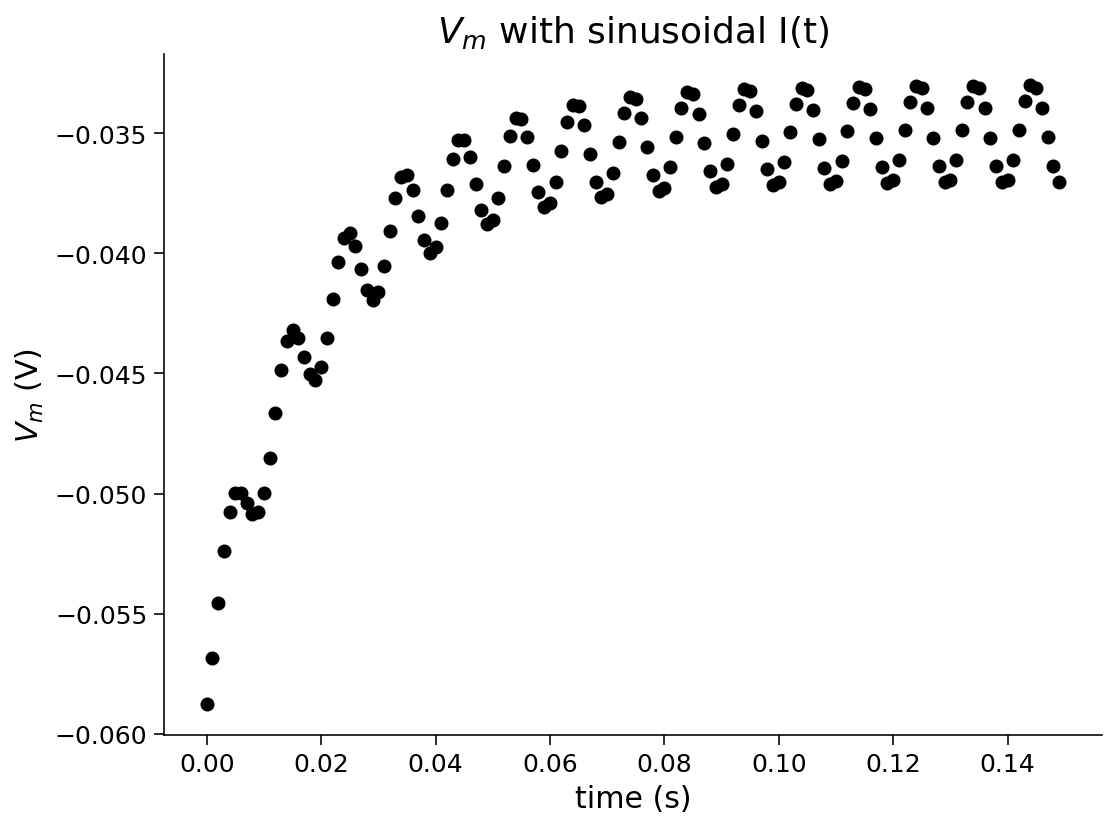

In [41]:
# Exercise 6
# initialize step_end and v
# step_end = ... # insert your code here
v = el
step_end = int(t_max / dt)

# initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)');

# loop for step_end steps
for step in range(step_end):
  t = step * dt

  # --> insert your code here
  # calculate current input
  i = i_mean * (1 + np.sin( ((2*np.pi) / 0.01) * t))

  # calculate membrane potential
  V = (el - v + r*i) * dt/tau + v
  v = V ## update membrane potential

  plt.plot(t, v, color='k', marker='o')

plt.show()


[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_6dcf3e19.py)

*Example output:*

<img alt='Solution hint' align='left' width=560 height=416 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_6dcf3e19_0.png>



---
## Random synaptic input
From the perspective of neurons, synaptic input is random (or stochastic). We'll improve the synaptic input model by introducing random input current with statistical properties similar to the previous exercise:

\begin{align*}
\\
I(t)=I_{mean}\left(1+0.1\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)\qquad\text{with }\xi(t)\sim U(-1,1)\\
\\
\end{align*}

where $U(-1,1)$ is the [uniform distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)) with support $x\in[-1,1]$.

Random synaptic input $I(t)$ results in random time course for $V(t)$.

### Exercise 7
Plot the values of $V(t)$ between $t=0$ and $t=t_{max}-\Delta t$ with random input $I(t)$.

Initialize the (pseudo) random number generator (RNG) to a fixed value to obtain the same random input each time.

The function `np.random.seed()` initializes the RNG, and `np.random.random()` generates samples from the uniform distribution between `0` and `1`.

**Suggestions**
* Use `np.random.seed()` to initialize the RNG to `0`
* Use `np.random.random()` to generate random input in range `[0,1]` at each timestep
* Multiply random input by an appropriate factor to expand the range to `[-1,1]`
* Verify that $V(t)$ has a random time course by changing the initial RNG value
* Alternatively, comment RNG initialization by typing `CTRL` + `\` in the relevant line

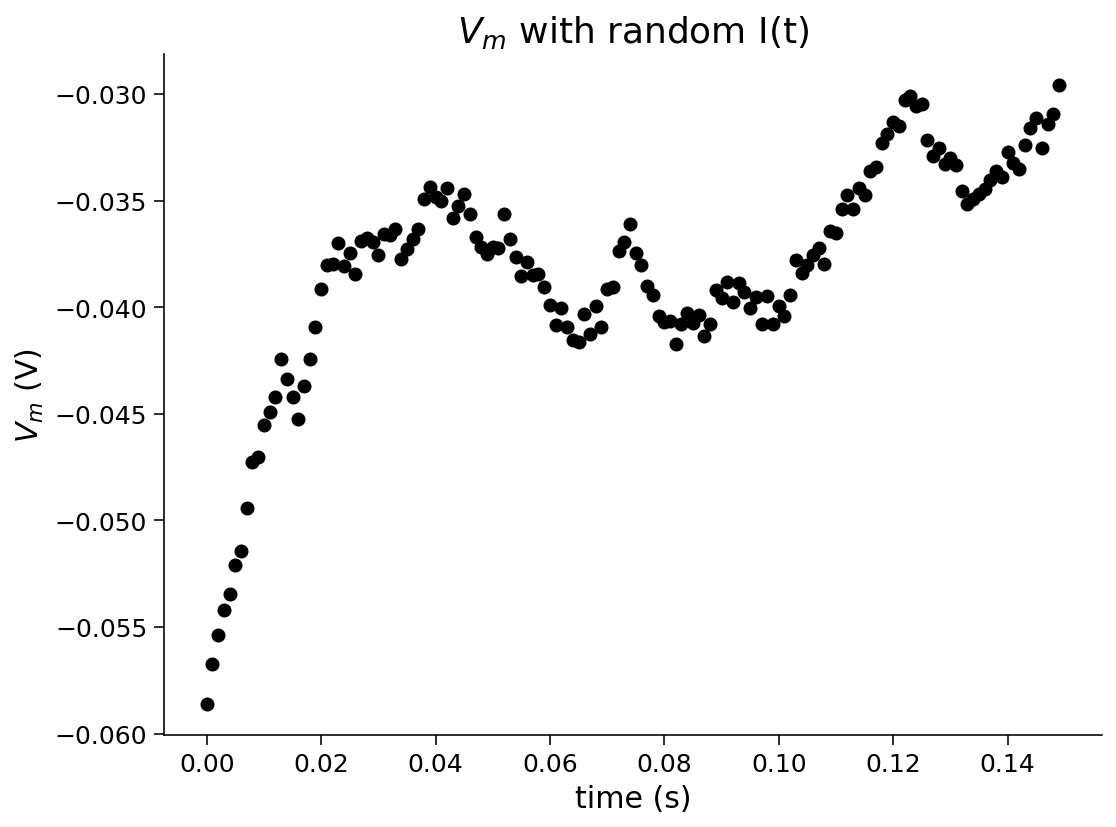

In [43]:
# Exercise 7
# set random number generator
np.random.seed(0)


# initialize step_end and v
step_end = int(t_max / dt)
v = el

# initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel(r'$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):
  t = step * dt

  # --> insert your code here
  E = np.random.uniform(low=-1, high=1)

  # calculate current input
  i = i_mean * (1 + 0.1*np.sqrt(t_max/dt)*E)

  # calculate membrane potential
  V = (el - v + r*i) * dt/tau + v
  v = V ## update membrane potential

  plt.plot(t, v, color='k', marker='o')

plt.show()  

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_695309c2.py)

*Example output:*

<img alt='Solution hint' align='left' width=560 height=416 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_695309c2_0.png>



## Ensemble statistics
Multiple runs of the previous exercise may give the impression of periodic regularity in the evolution of $V(t)$. We'll collect the sample mean over $N=50$ realizations of $V(t)$  with random input to test such a hypothesis. The sample mean, sample variance and sample autocovariance at times $\left\{t, s\right\}\in[0,t_{max}]$, and for $N$ realizations $V_n(t)$ are given by:

\begin{align*}
\\
\left\langle V(t)\right\rangle &= \frac{1}{N}\sum_{n=1}^N V_n(t) & & \text{sample mean}\\
\left\langle (V(t)-\left\langle V(t)\right\rangle)^2\right\rangle &= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)^2 & & \text{sample variance} \\
\left\langle \left(V(t)-\left\langle V(t)\right\rangle\right)\left(V(s)-\left\langle V(s)\right\rangle\right)\right\rangle
&= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)\left(V_n(s)-\left\langle V(s)\right\rangle\right) & & \text{sample autocovariance}\\
\\
\end{align*}

Video available at https://youtube.com/watch?v=4nIAS2oPEFI


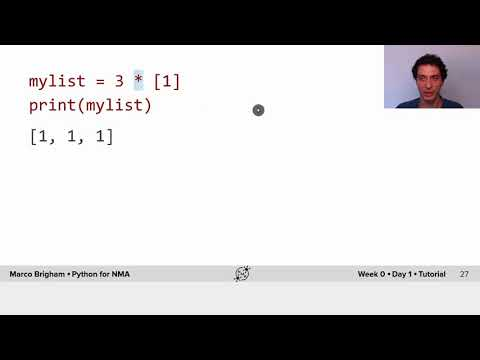

In [ ]:
# @title Video: Ensemble statistics
video = YouTubeVideo(id='4nIAS2oPEFI', width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

### Exercise 8
Plot multiple realizations ($N=50$) of $V(t)$ by storing in a list the voltage of each neuron at time $t$.

Keep in mind that the plotting command `plt.plot(x, y)` requires `x` to have the same number of elements as `y`.

Mathematical symbols such as $\alpha$ and $\beta$ are specified as `$\alpha$` and `$\beta$` in [TeX markup](https://en.wikipedia.org/wiki/TeX). See additional details in [Writing mathematical expressions](https://matplotlib.org/3.2.2/tutorials/text/mathtext.html) in Matplotlib.

**Suggestions**
* Initialize a list `v_n` with `50` values of membrane leak potential `el`
* At each time step:
  * Plot `v_n` with argument `'k.'` and parameter `alpha=0.05` to adjust the transparency (by default, `alpha=1`)
  * In the plot command, replace `t` from the previous exercises with a list of size `n` with values `t`
  * Loop over `50` realizations of random input
  * Update `v_n` with the values of $V(t)$

* Why is there a black dot at $t=0$?

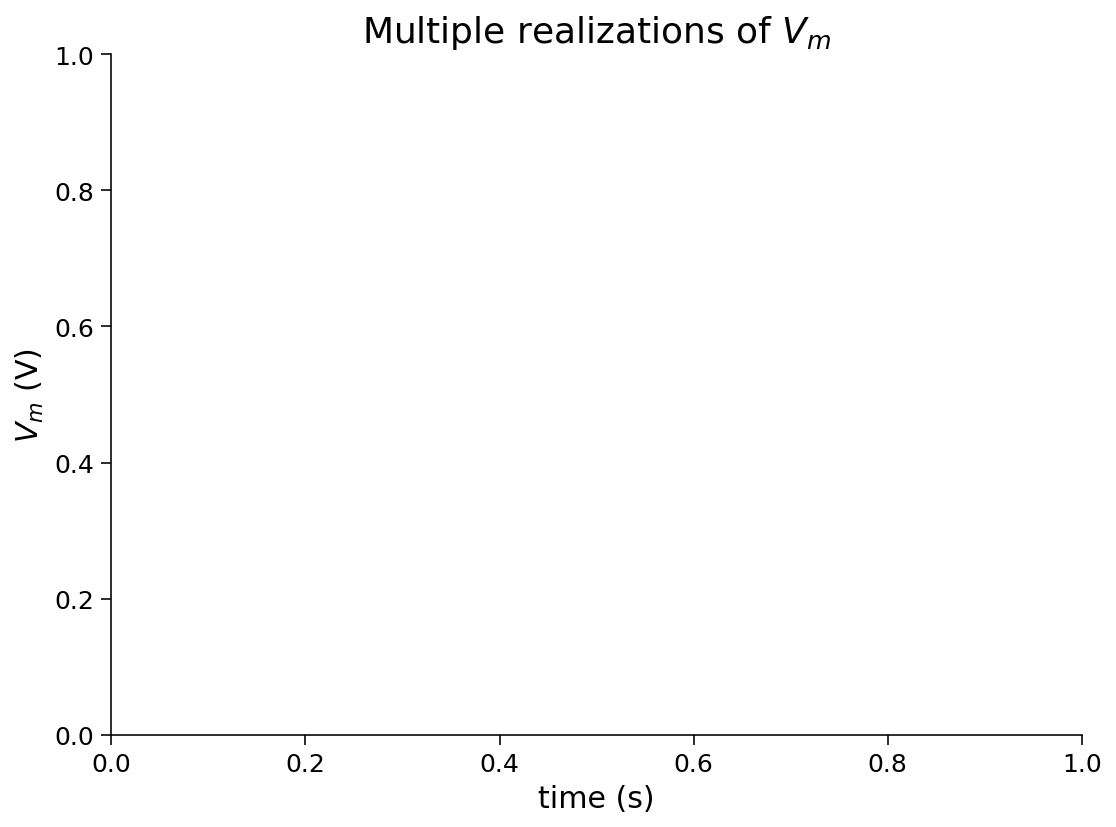

In [ ]:
# Exercise 8
# set random number generator
np.random.seed(2020)

# initialize step_end, n and v_n
step_end = int(t_max / dt)
n = 50
# v_n = ... # --> insert your code here

# initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):
  t = step * dt

  # --> insert your code here

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_133978a8.py)

*Example output:*

<img alt='Solution hint' align='left' width=558 height=413 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_133978a8_0.png>



### Exercise 9
Add the sample mean $\left\langle V(t)\right\rangle=\frac{1}{N}\sum_{n=1}^N V_n(t)$ to the plot.

**Suggestions**
* At each timestep:
  * Compute and store in `v_mean` the sample mean $\left\langle V(t)\right\rangle$ by summing the values of list `v_n` with `sum` and dividing by `n`
  * Plot $\left\langle V(t)\right\rangle$ with `alpha=0.8` and argument `'C0.'` for blue (you can read more about [specifying colors](https://matplotlib.org/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py))
  * Loop over `50` realizations of random input
  * Update `v_n` with the values of $V(t)$

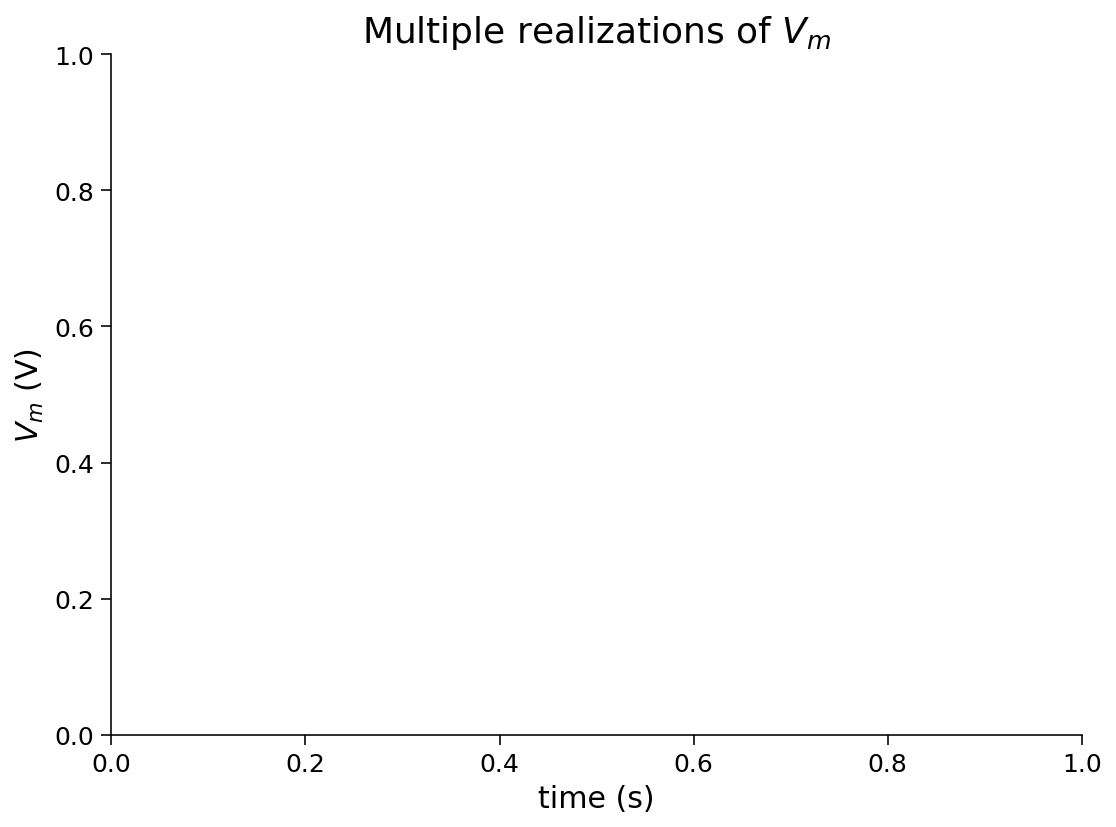

In [ ]:
# Exercise 9
# set random number generator
np.random.seed(2020)

# initialize step_end, n and v_n
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

# initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):
  t = step * dt

  # --> insert your code here

plt.show()

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_0ea7fc4b.py)

*Example output:*

<img alt='Solution hint' align='left' width=558 height=413 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_0ea7fc4b_0.png>



### Exercise 10
Add the sample standard deviation $\sigma(t)\equiv\sqrt{\text{Var}\left(t\right)}$ to the plot, with sample variance $\text{Var}(t) = \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)^2$.

Use a list comprehension to collect the sample variance `v_var`. Here's an example to initialize a list with squares of `0` to `9`:
```
squares = [x**2 for x in range(10)]
print(squares)
--> [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
```

Why are we plotting $\sigma(t)$ rather than the $\text{Var}(t)$? What are the units of each and the units of $\left\langle V(t)\right\rangle$?

**Suggestions**
* At each timestep:
  * Compute and store in `v_mean` the sample mean $\left\langle V(t)\right\rangle$
  * Initialize a list `v_var_n` with the contribution of each $V_n(t)$ to $\text{Var}\left(t\right)$ with a list comprehension over values of `v_n`
  * Compute sample variance `v_var` by summing the values of `v_var_n` with `sum` and dividing by `n-1`
  * (alternative: loop over the values of `v_n` and add to `v_var` each contribution $V_n(t)$ and divide by `n-1` outside the loop)
  * Compute the standard deviation `v_std` with the function `np.sqrt`
  * Plot $\left\langle V(t)\right\rangle\pm\sigma(t)$ with `alpha=0.8` and argument `'C7.'`

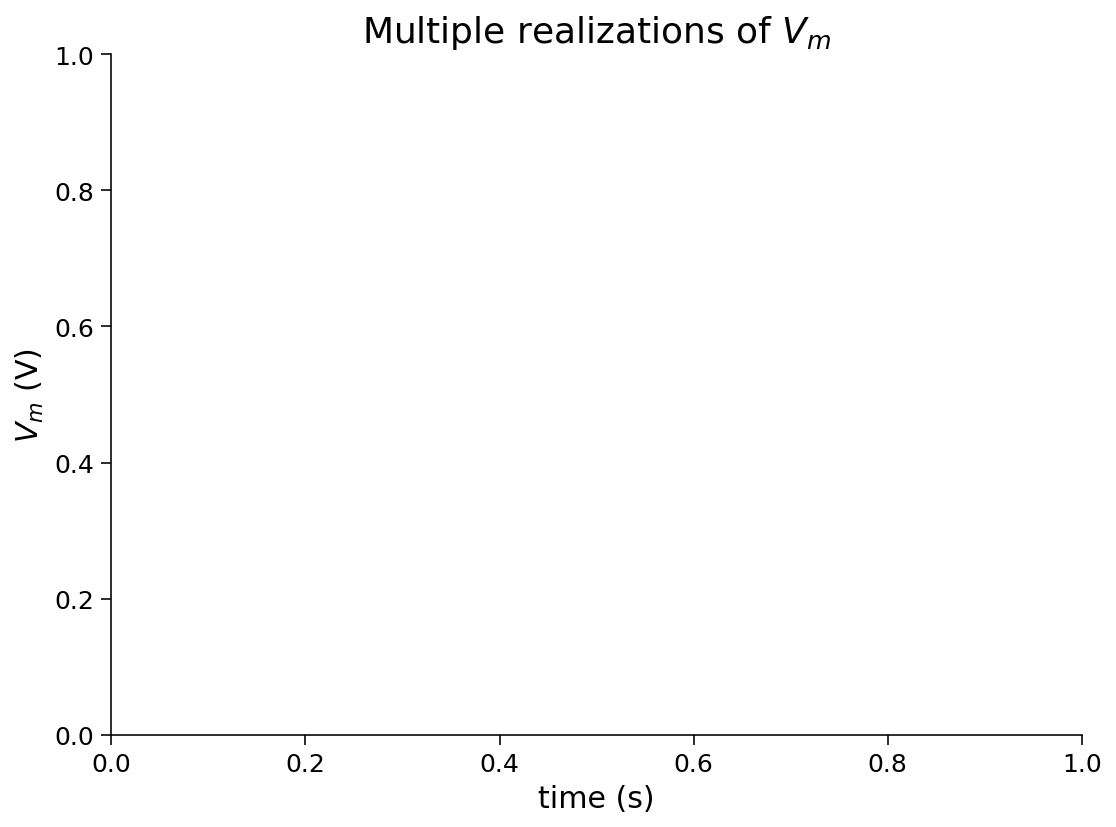

In [ ]:
# Exercise 10
# set random number generator
np.random.seed(2020)

# initialize n, v_n and step_end
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

# initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):
  t = step * dt
  v_mean = sum(v_n) / n

  # --> insert your code here

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_9b06c9a8.py)

*Example output:*

<img alt='Solution hint' align='left' width=558 height=413 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_9b06c9a8_0.png>



---
## Using NumPy
The next set of exercises introduces `np.array`, the workhorse from the scientific computation package [NumPy](https://numpy.org). Numpy arrays the default for numerical data storage and computation and will separate computing steps from plotting.

![NumPy package](https://github.com/mpbrigham/colaboratory-figures/raw/master/nma/python-for-nma/numpy_logo_small.png)

We updated plots inside the main loop in the previous exercises and stored intermediate results in lists for plotting them. The purpose was to simplify earlier exercises as much as possible. However, there are very few scenarios where this technique is necessary, and you should avoid it in the future. Using numpy arrays will significantly simplify our coding narrative by computing inside the main loop and plotting afterward.

Lists are much more natural for storing data for other purposes than computation. For example, lists are handy for storing numerical indexes and text.

Video available at https://youtube.com/watch?v=ewyHKKa2_OU


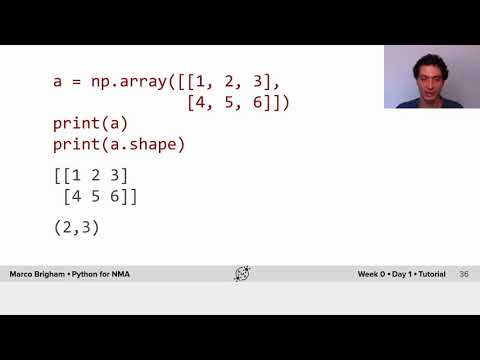

In [ ]:
# @title Video: Using NumPy
video = YouTubeVideo(id='ewyHKKa2_OU', width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

### Exercise 11
Rewrite the single neuron plot with random input from _Exercise 7_ with numpy arrays. The time range, voltage values, and synaptic current are initialized or pre-computed as numpy arrays before numerical integration.

**Suggestions**
* Use `np.linspace` to initialize a numpy array `t_range` with `num=step_end=100` values from `0` to `t_max`
* Use `np.ones` to initialize a numpy array `v` with `step_end` leak potential values `el`
* Pre-compute `step_end` synaptic current values in numpy array `syn` with `np.random.random(step_end)` for `step_end` random numbers
* Iterate for numerical integration of `v`
* Since `v[0]=el`, we should iterate for `step_end - 1` steps, for example by skipping `step=0`. Why?

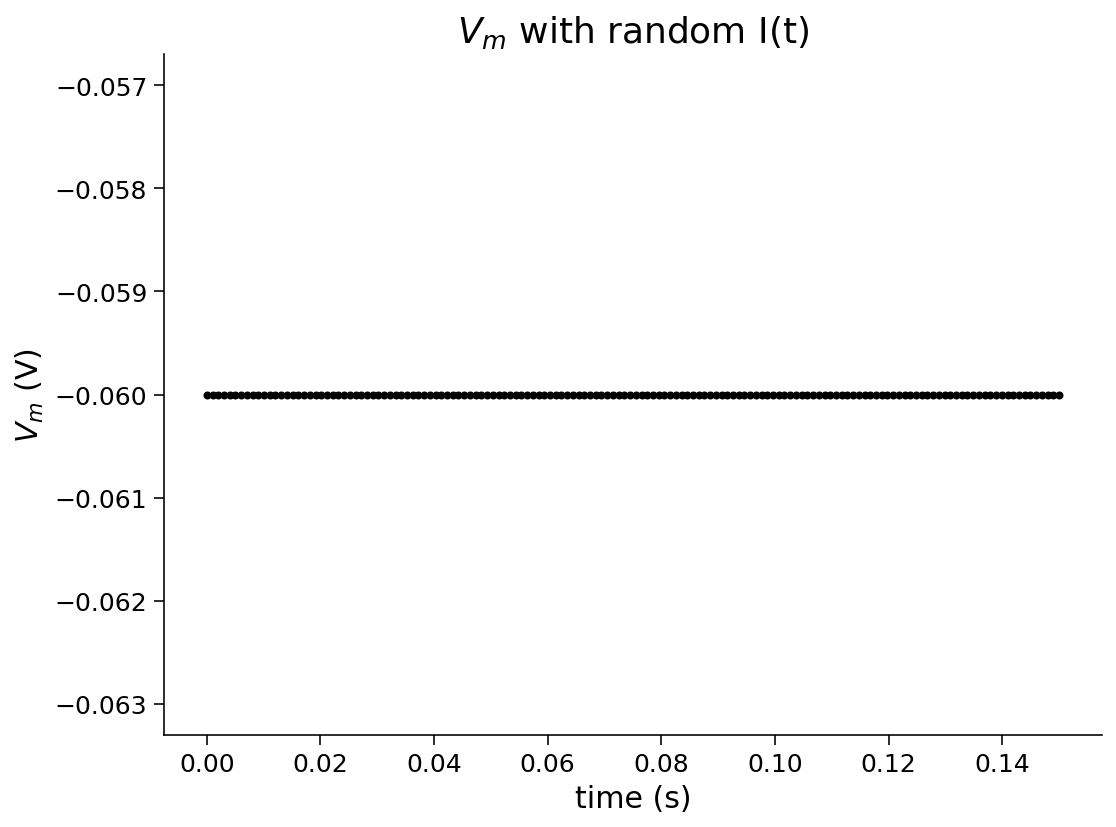

In [ ]:
# Exercise 11
# set random number generator
np.random.seed(2020)

# initialize step_end, t_range, v and syn
step_end = int(t_max/dt)
t_range = np.linspace(0, t_max, num=step_end)
v = el * np.ones(step_end)

# --> insert your code here


plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel(r'$V_m$ (V)')

plt.plot(t_range, v, 'k.')
plt.show()

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_218a234b.py)

*Example output:*

<img alt='Solution hint' align='left' width=560 height=416 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_218a234b_0.png>



### Exercise 12
Let's practice using `enumerate` to iterate over the indexes and values of the synaptic current array `syn`.

**Suggestions**
* Iterate indexes and values of `syn` with `enumerate` in the `for` loop
* Plot `v` with argument `'k'` for displaying a line instead of dots

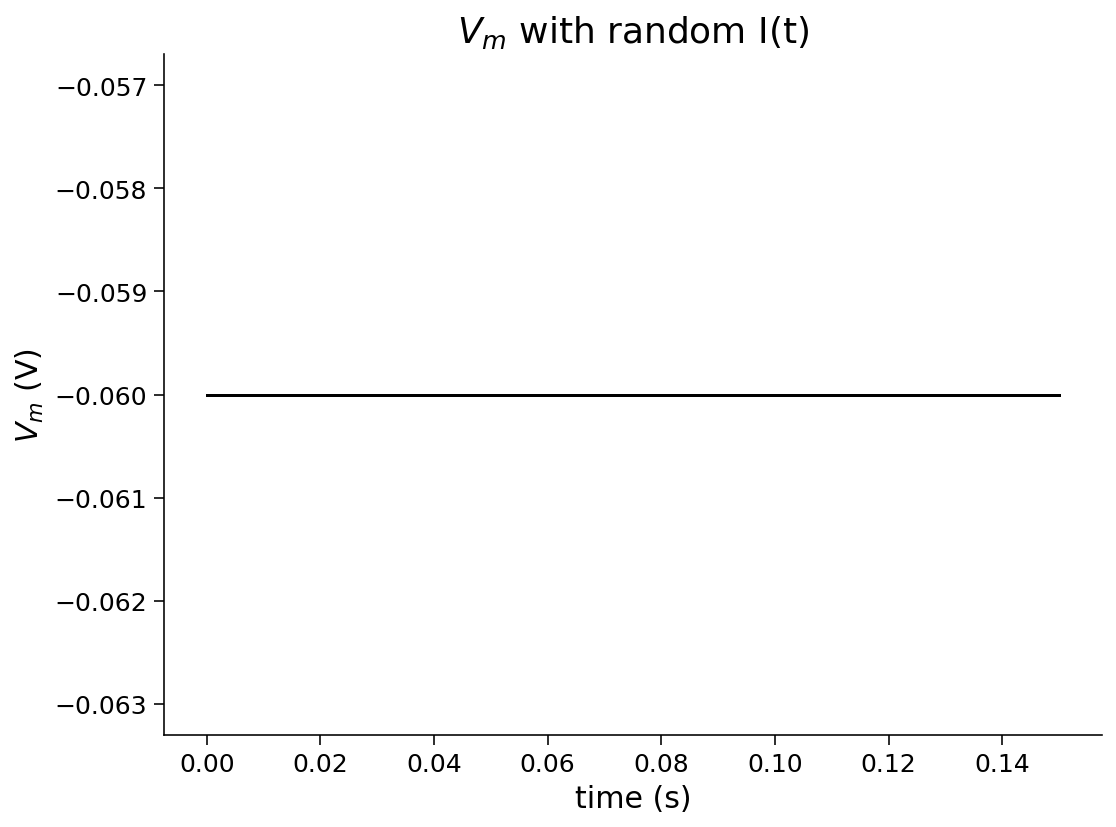

In [ ]:
# Exercise 12
# set random number generator
np.random.seed(2020)

# initialize step_end, t_range, v and syn
step_end = int(t_max / dt)
t_range = np.linspace(0, t_max, num=step_end)
v = el * np.ones(step_end)
syn = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random(step_end) - 1))

# --> insert your code here



plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel(r'$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_b24ee7b3.py)

*Example output:*

<img alt='Solution hint' align='left' width=560 height=416 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_b24ee7b3_0.png>



Video available at https://youtube.com/watch?v=1ME-0rJXLFg


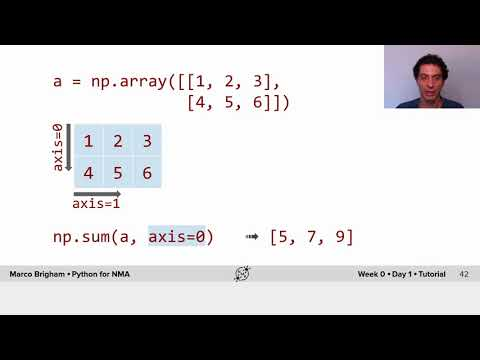

In [ ]:
# @title Video: Aggregation
video = YouTubeVideo(id='1ME-0rJXLFg', width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

### Exercise 13
Plot multiple realizations ($N=50$) of $V(t)$ by storing the voltage of each neuron at time $t$ in a numpy array.

**Suggestions**
* Initialize a numpy array `v_n` of shape `(n, step_end)` with membrane leak potential values `el`
* Pre-compute synaptic current values in numpy array `syn` of shape `(n, step_end)`
* Iterate `step_end` steps with a `for` loop for numerical integration
* Plot results with a single plot command, by providing `v_n.T` to the plot function. `v_n.T` is the transposed version of `v_n` (with rows and columns swapped).

In [ ]:
# Exercise 13
# set random number generator
np.random.seed(2020)

# initialize step_end, n, t_range, v and syn
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])

# --> insert your code here


[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_597a43c1.py)

*Example output:*

<img alt='Solution hint' align='left' width=560 height=416 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_597a43c1_0.png>



### Exercise 14
Add sample mean $\left\langle V(t)\right\rangle$ and standard deviation $\sigma(t)\equiv\sqrt{\text{Var}\left(t\right)}$ to the plot.

`np.mean(v_n, axis=0)` computes mean over rows, i.e. mean for each neuron

`np.mean(v_n, axis=1)` computes mean over columns (axis `1`), i.e. mean for each time step

**Suggestions**
* Use `np.mean` and `np.std` with `axis=0` to sum over neurons
* BONUS: Use `label` argument in `plt.plot` to specify labels in each trace. Label only the last voltage trace to avoid labeling all `N` of them.

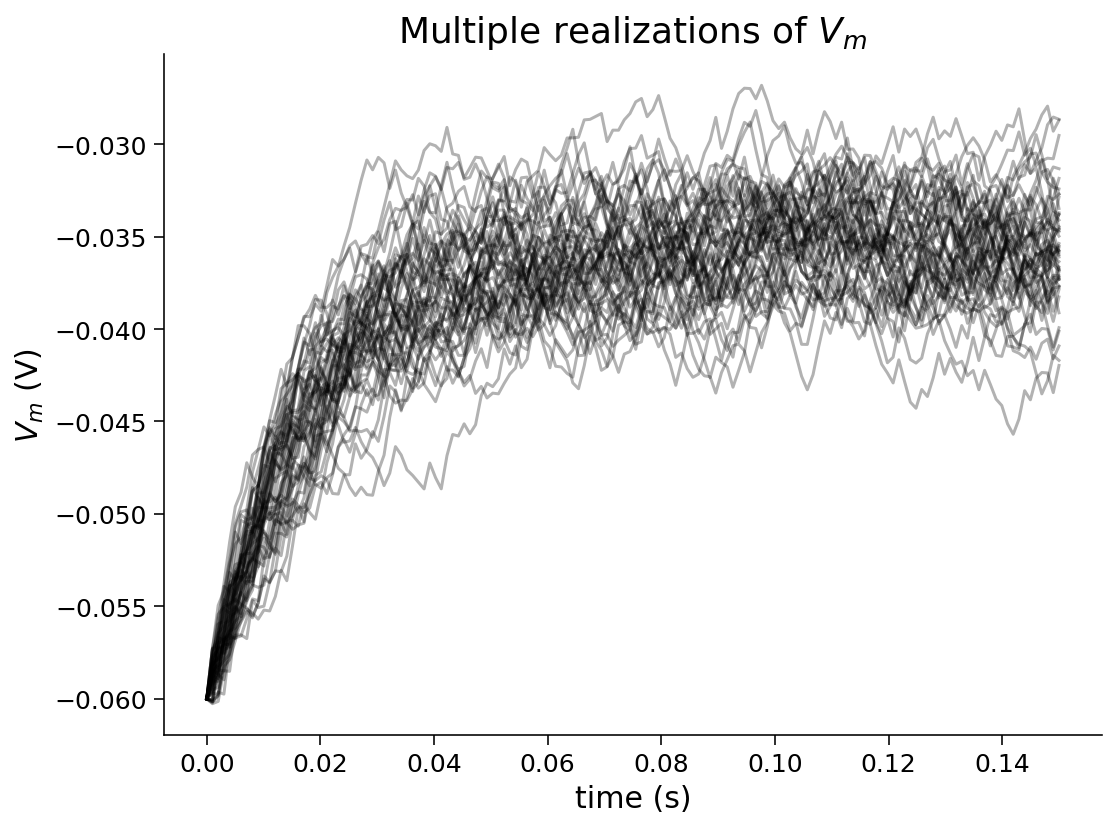

In [ ]:
# Exercise 14
# set random number generator
np.random.seed(2020)

# initialize step_end, n, t_range, v and syn
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
syn = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# loop for step_end - 1 steps
for step in range(1, step_end):

  v_n[:,step] = v_n[:,step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * syn[:, step])

# --> insert your code here




plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n[:-1].T, 'k', alpha=0.3)
plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label='V(t)')


plt.show()

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D1_PythonWorkshop1/solutions/W0D1_Tutorial1_Solution_6a252098.py)

*Example output:*

<img alt='Solution hint' align='left' width=560 height=416 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D1_PythonWorkshop1/static/W0D1_Tutorial1_Solution_6a252098_0.png>

